In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/Users/aditi/Desktop/286_project/insurance.csv')

In [26]:
# Set up for pandas and seasborn

pd.set_option("display.float_format", "{:.2f}".format) # formatting float data type and displaying only 2 decimal points

In [27]:
sns.set(style="whitegrid", palette="Set2", font_scale= 1.1)

In [28]:
# check for duplicates values

df.duplicated().sum()

np.int64(0)

In [29]:
df.isna().sum().sum()

np.int64(8)

In [30]:
# Since missing values is small, we can drop those rows

df.dropna(inplace=True)

In [31]:
df.shape

(1332, 10)

In [32]:
# to check missing values again

df.isna().sum().sum()

np.int64(0)

In [33]:
# to summary statistics 

df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


In [34]:
# to check numerical data types columns

df.describe()



,Id,age,bmi,bloodpressure,children,claim
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,674.47,38.09,30.66,94.19,1.10,13325.25
std,384.70,11.11,6.12,11.45,1.21,12109.62
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,341.75,29.00,26.20,86.00,0.00,4760.16
50%,674.50,38.00,30.35,92.00,1.00,9412.97
75%,1007.25,47.00,34.73,99.00,2.00,16781.33
max,1340.00,60.00,53.10,140.00,5.00,63770.43


In [35]:
# Average age is 38.09 years
# Minimum age is 18 years
# Maximum age is 60 years
# BMI average is 30.66
# Minimum BMI is 16.00
# Maximum BMI is 53.13
#Claim average is 13325.25
# Claim minimum is 1121.87
# Claim maximum is 63770.43
# Non Smoker top occuring value is 1058 
# smoker top occuring value is 274
# top appearing value is southeast


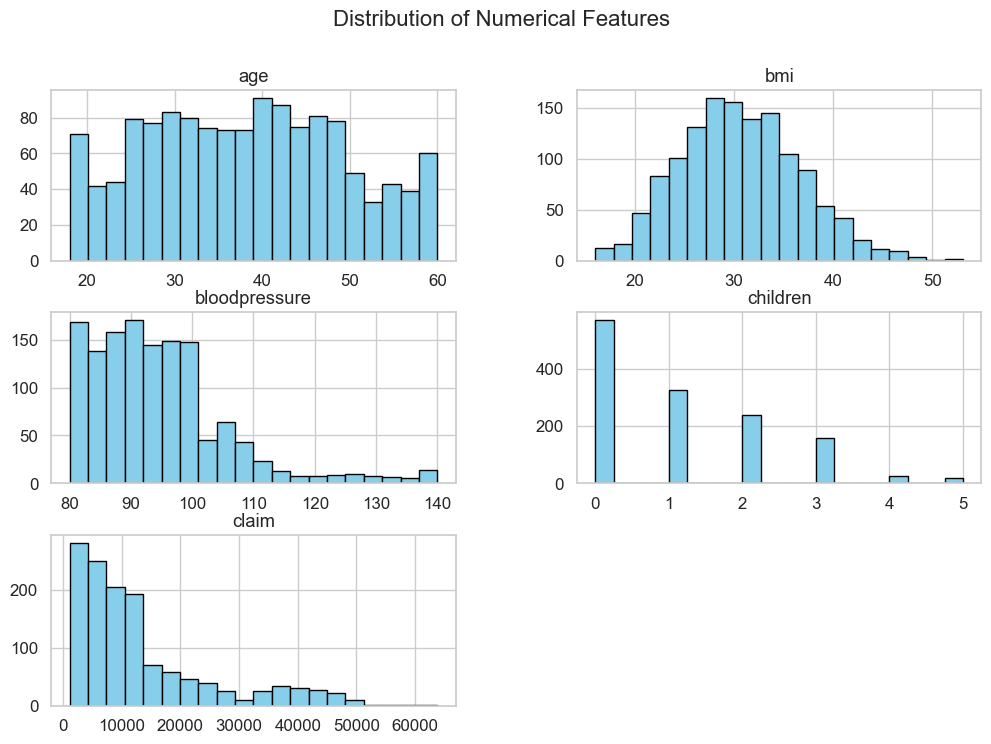

In [36]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins= 20,figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

In [37]:
# age is well distributed 20 60 
# BMI looks like normal distribution
# bloodpressure more values at lower end 80 to 100 side
# CHildren we have most at no children and one children's side
# claim side we have more values at lower end

/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/2443574024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/2443574024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/2443574024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/

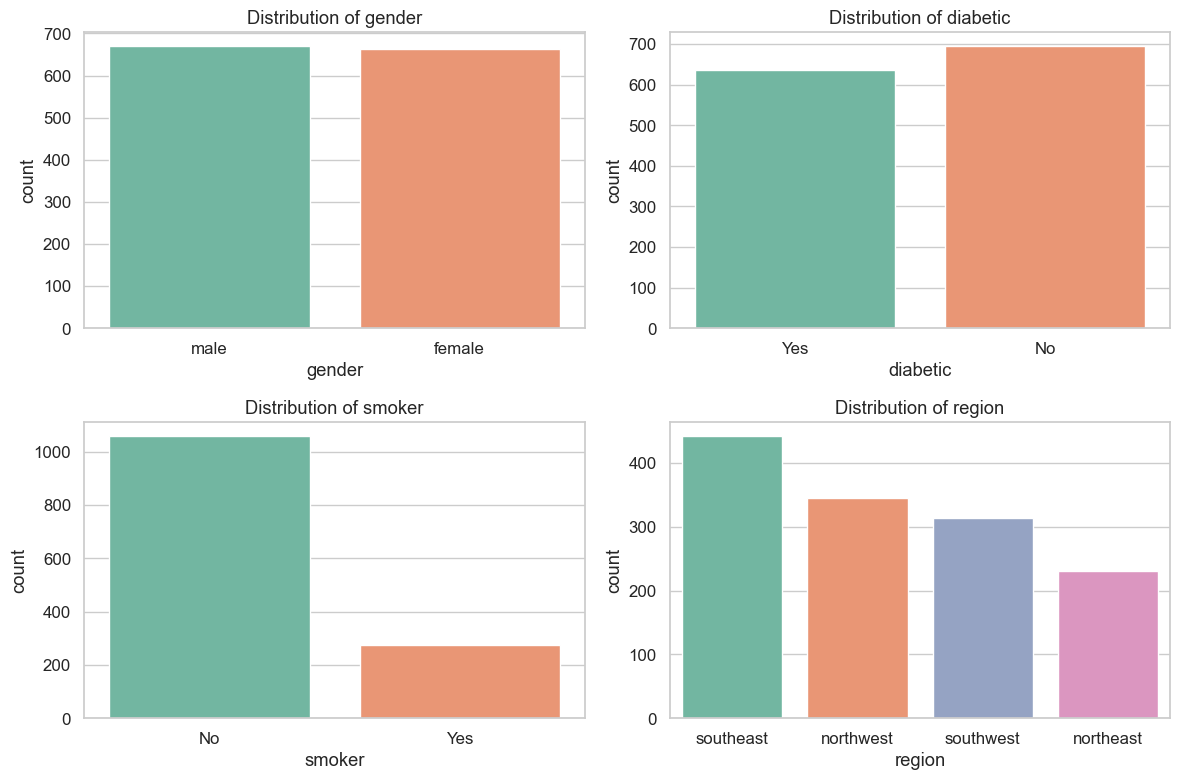

In [38]:
# Categorial distribution

cat_cols = ["gender", "diabetic","smoker", "region"]

plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols,1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()


In [39]:
# to explore how claim  varies with the key factors 

df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

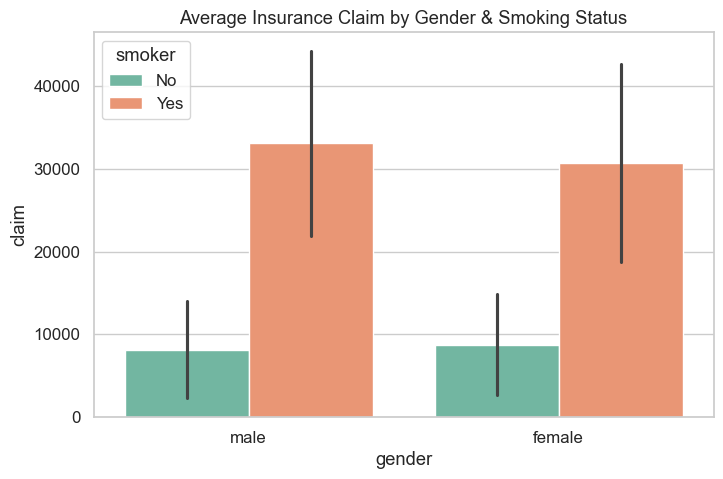

In [40]:
# this shows if someone is smoker their insurance claim is higher than non smoker
plt.figure(figsize=(8,5))
sns.barplot(data = df,x = "gender", y = "claim", hue = "smoker", estimator= "mean", errorbar= "sd", palette='Set2')
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()



In [41]:
# to check average claim by region and diabetic status

pivot_region_diabetic = df.groupby(["region","diabetic"])["claim"].mean().round(2).unstack()

In [42]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


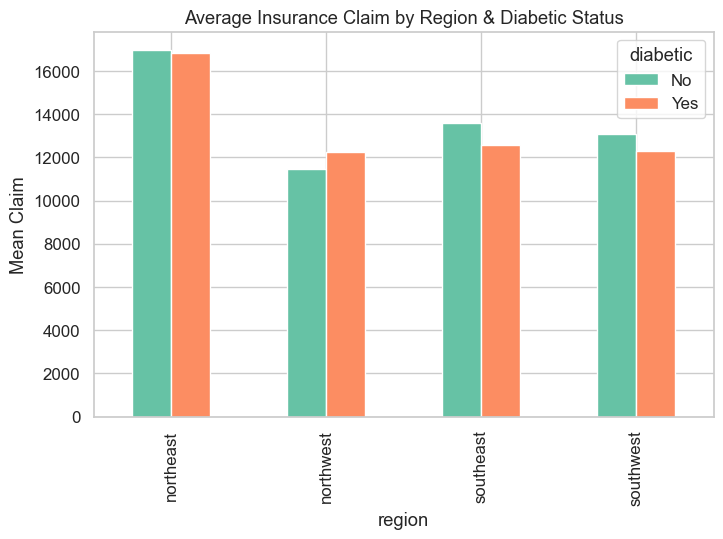

In [43]:
pivot_region_diabetic.plot(kind='bar', figsize=(8,5))
plt.title("Average Insurance Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [44]:
# Without considering the region diabetic status does not have much impact on claim amount
# Average claim is higher for southeast region

In [45]:
# to check average claim by smoker and region

pivot_table =pd.pivot_table(df, values='claim', index='region', columns='smoker', aggfunc='mean').round(2)
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [46]:
# we can see how the values increase for smoker in each region

In [47]:
# to check avergae claim by diabetic and children count.

pivot_table = pd.pivot_table(df, values='claim', index='children', columns='diabetic', aggfunc='mean').round(2)
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [48]:
# children with count 2 has higher claim amout for diabetic and non diabetic both

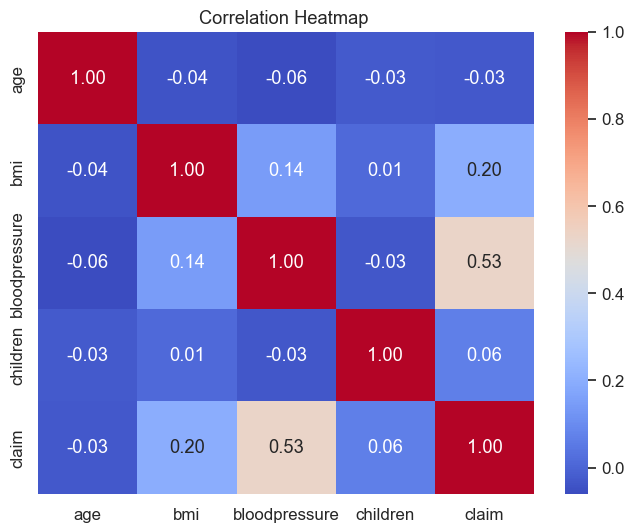

In [49]:
# Correlation heatmap for numerical features

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(),annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap ")
plt.show()

In [50]:
# It shows that blood pressure is a little bit correlated with claim and features are not really correlated.
# not postively nor neagtively because we dont have any values closer to 1 and -1


In [51]:
# Realtionship analysis


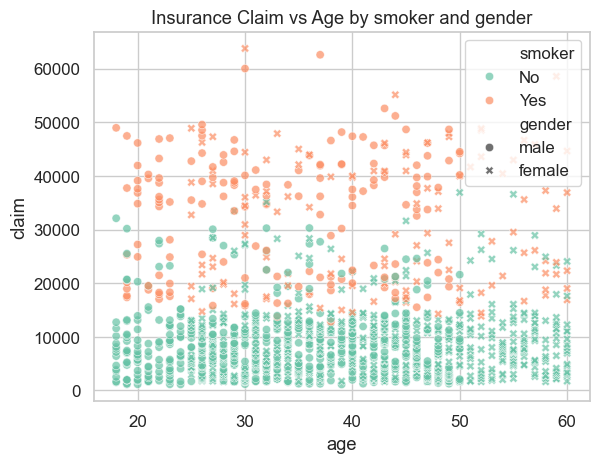

In [52]:
# Claim and Age

sns.scatterplot(data=df, x='age', y='claim', hue='smoker', style='gender', alpha=0.7, palette='Set2')
plt.title("Insurance Claim vs Age by smoker and gender")
plt.show()


In [53]:
# we dont really see gender based difference but we can see smoker difference for all age groups like if someone is smoker claim amount is higher

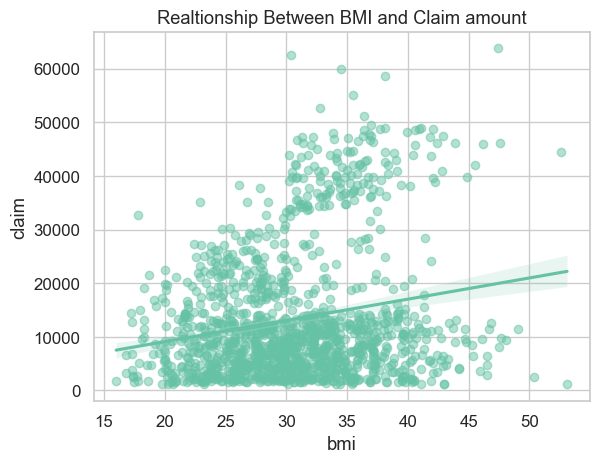

In [54]:
# To check for BMI and claim

sns.regplot(data = df, x = "bmi", y = "claim", scatter_kws={'alpha':0.5})
plt.title("Realtionship Between BMI and Claim amount")
plt.show()

In [ ]:
# general trend is when bmi increases claim amount also increases

/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/4215317552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='children', y='claim', palette='Set2')


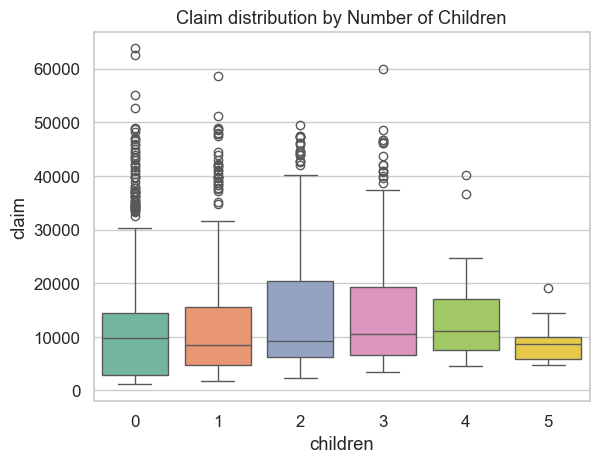

In [55]:
# Children and claim

sns.boxplot(data=df, x='children', y='claim', palette='Set2')   
plt.title("Claim distribution by Number of Children")  
plt.show()

In [56]:
# Children count 2 or 3 have the highest insurance claim amounts compared to others.

In [57]:
# not treating age as continuous , creating age bands and checking claim amount

df["age_group"] = pd.cut (df["age"],bins = [0,18,39,45,60,100], labels = ["<18", "18-30","31-45","46-60", "60+"])

df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,18-30
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,18-30


In [58]:
df["age_group"].value_counts()

age_group
18-30    706
46-60    383
31-45    227
<18       16
60+        0
Name: count, dtype: int64

/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/245146875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "age_group", y = "claim", estimator= "mean", errorbar= "sd", palette='Set2')


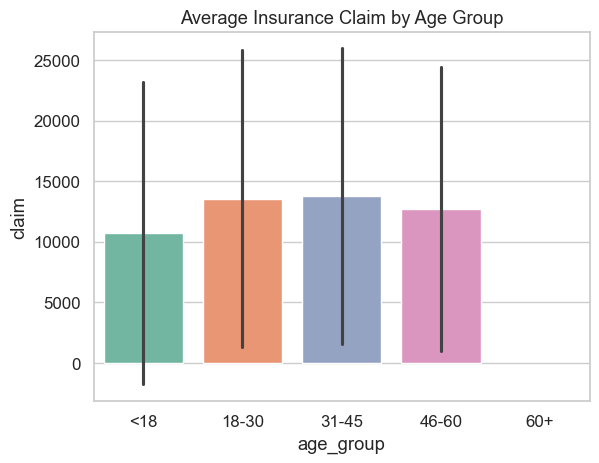

In [60]:
# to check average claim by age group

sns.barplot(data = df, x = "age_group", y = "claim", estimator= "mean", errorbar= "sd", palette='Set2')
plt.title("Average Insurance Claim by Age Group")
plt.show()


In [ ]:
# age group 18-30 has higher claim amount compared to other age groups

In [61]:
# lets classify BMI into vote organization categories and compare the average claim

df["bmi_category"] = pd.cut(df["bmi"], bins=[0,18.5,24.9,29.9,100], labels=["Underweight","Normal weight","Overweight","Obesity"])
df["bmi_category"].value_counts()

bmi_category
Obesity          702
Overweight       387
Normal weight    222
Underweight       21
Name: count, dtype: int64

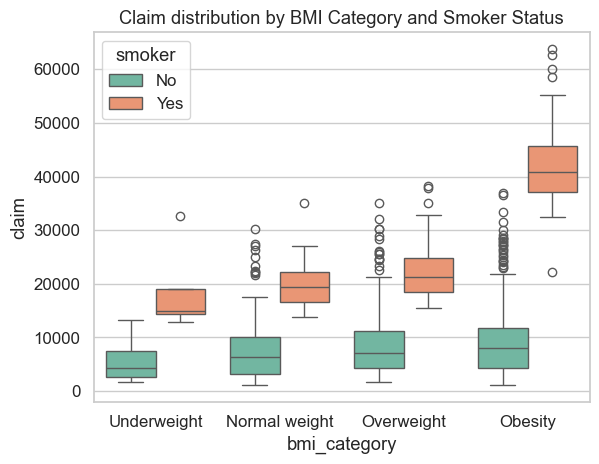

In [62]:
# lets classify BMI into vote organization categories and compare the average claim
# lets see in a boxplot

sns.boxplot(data=df, x='bmi_category', y='claim',hue= "smoker", palette='Set2')
plt.title("Claim distribution by BMI Category and Smoker Status")
plt.show()


In [63]:
# if someone is obese and smoker option is yes , it has highest average claim amount

/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/3273624937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bmi_category', y='claim', palette='Set2')


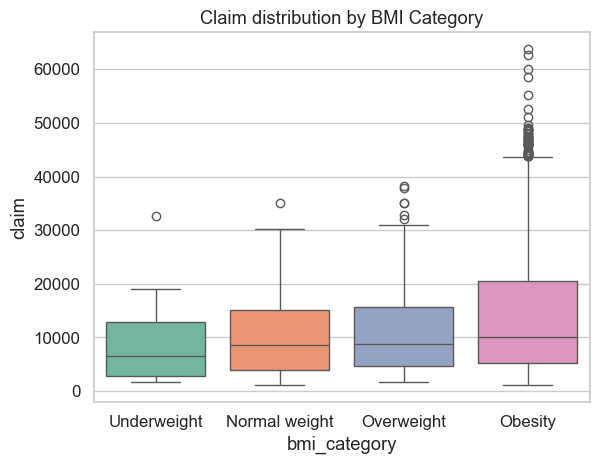

In [64]:
# without the smoker status

sns.boxplot(data=df, x='bmi_category', y='claim', palette='Set2')
plt.title("Claim distribution by BMI Category")
plt.show()

In [ ]:
# Underweight option as the lowest average claim amount and Obesity has the highest average claim amount

In [65]:
# to check smoker ratio and claim ratio by region

region_stats = df.groupby('region').agg(
    smoker_rate = ("smoker", lambda x: (x == "Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [66]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/2520734185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = region_stats, x="region", y="smoker_rate", ax=ax1, alpha = 0.6, palette='Set2')


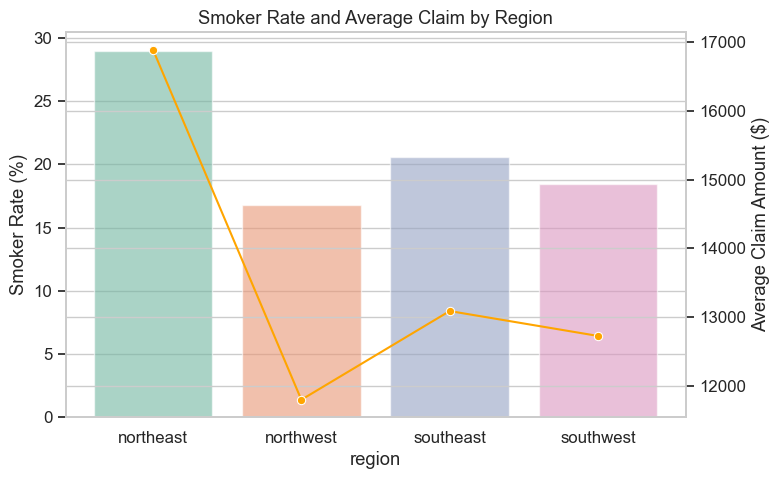

In [67]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data = region_stats, x="region", y="smoker_rate", ax=ax1, alpha = 0.6, palette='Set2')
ax2 = ax1.twinx()
sns.lineplot(data = region_stats, x="region", y="mean_claim", ax=ax2, color='orange', marker='o')


ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim Amount ($)")
plt.title("Smoker Rate and Average Claim by Region")
plt.show()

In [ ]:
# Data preparation for modeling

In [68]:
# Import

from sklearn.model_selection import train_test_split  # for splitting data into train and test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # for encoding categorical variables and scaling numerical features
import joblib # because we are going to export both to the encoders and scalers and we are going tuse same scaler and the label encoder that we use in this notenbook in this some tab
# we are going to save them as pickle files and in the some tab we are going to load them back and use them again.


In [69]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [70]:
X = df [["age","gender","bmi","bloodpressure","children","diabetic","smoker"]]
Y = df["claim"]

In [71]:
# include the categorical features [gender,diabetic, smoker]

cat_cols = ["gender","diabetic","smoker"]
label_encoders = {}

In [72]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"{col}_label_encoder.pkl")

/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/402370974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/402370974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/n_/nw87nr452kv94d9ss9wyw8_h0000gp/T/ipykernel_2454/402370974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [73]:
X

,age,gender,bmi,bloodpressure,children,diabetic,smoker
0,39.00,1,23.20,91,0,1,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,0,1,1
1336,59.00,0,38.10,120,1,0,1
1337,30.00,1,34.50,91,3,1,1
1338,37.00,1,30.40,106,0,0,1


In [74]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [75]:
# Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#which means that 20% of the data will be used for testing and 80% for training the model.

In [76]:
#doing this before scaling because we are only going to do fit transform of our scaler in training set because we dont want any data leakage from test set to training set

# Scaling numerical features

numeric_cols = ["age","bmi","bloodpressure","children"]
scaler = StandardScaler()

In [77]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [78]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [79]:
# Training set shape and test set shape

print(X_train.shape, Y_train.shape)

(1065, 7) (1065,)


In [80]:
print(X_test.shape, Y_test.shape)

(267, 7) (267,)


In [81]:
# Train machine learning models
# Parameter tunning for all the models
# we are going to create a comparison table at the end
# Train all the models in one cell and onlt going to talk about results in comparison table
# Going to pick best model programmatically .
# Going to export that model using codes, not by typing models name
# Alogorithm used are going to be the linear regression, polynomial regression,random forest regression, support vector regresssion and XG boost regression

In [90]:
import numpy as np # numpy library for numerical operations
from sklearn.linear_model import LinearRegression # Linear Regression model, used for predicting continuous target variables
from sklearn.preprocessing import PolynomialFeatures # for generating polynomial features, it helps in capturing non-linear relationships
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor model, an ensemble learning method for regression tasks, it performs its tasks by constructing multiple decision trees
from sklearn.svm import SVR # Support Vector Regressor model, used for regression tasks by finding the hyperplane that best fits the data
from sklearn.model_selection import GridSearchCV, cross_val_score # for hyperparameter tuning using grid search with cross-validation, it helps in finding the best combination of hyperparameters for a given model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluating model performance using various metrics, it works by calculating the errors between predicted and actual values
import xgboost as XGBRegressor  # type: ignore # XGBoost library for gradient boosting, it is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable

In [108]:
# do any regression problem

def evaluate_model(model, X_train, X_test, Y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"R2" : r2, "MAE": mae, "RMSE" : rmse}




    

In [109]:
results = {} # dictionary to store model evaluation results

In [110]:
# model training codes
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, Y_train)


results["Linear Regression"] = evaluate_model(lr, X_train, X_test, Y_train, Y_test)

print("Linear Regression model is trained")

# Polynomial Regression
best_poly_model = None
best_poly_score = -np.inf

for degree in [2,3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)


    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, Y_train)

    score = poly_lr.score(X_test_poly, Y_test)

    if score > best_poly_score:

        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly , poly_lr = best_poly_model


results[f"Polynomial Regression (deg={degree})"] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), Y_train, Y_test)

print("Polynomial Regression models are trained")


# Random Forest Regression

rf = RandomForestRegressor()

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
rf_grid.fit(X_train, Y_train)
best_rf = rf_grid.best_estimator_


results["Random Forest Regression"] = evaluate_model(best_rf, X_train, X_test, Y_train, Y_test)

print("Random Forest training is completed, best parameters", rf_grid.best_params_)

#suppport vectpor regression


svr = SVR() 

svr_params = {
    'kernel': ["rbf", "poly", "linear"],
    'C': [1, 10, 50],
    'epsilon': [0.1, 0.2, 0.5],
    "degree": [2,3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
svr_grid.fit(X_train, Y_train)
best_svr = svr_grid.best_estimator_


results["Support Vector Regression"] = evaluate_model(best_svr, X_train, X_test, Y_train, Y_test)

print("Support Vector Regression training is completed, best parameters", svr_grid.best_params_)


xgb = XGBRegressor.XGBRegressor(objective='reg:squarederror')   
     
xgb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3,5,7],
    "subsample": [0.8,1.0]
}


xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
xgb_grid.fit(X_train, Y_train)  
best_xgb = xgb_grid.best_estimator_


results["XGBoost Regression"] = evaluate_model(best_xgb, X_train, X_test, Y_train, Y_test)


print("XGBoost training is completed, best parameters", xgb_grid.best_params_)




Linear Regression model is trained
Polynomial Regression models are trained
Random Forest training is completed, best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Support Vector Regression training is completed, best parameters {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training is completed, best parameters {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [112]:
results

{'Linear Regression': {'R2': 0.6838478910700803,
  'MAE': 4624.487280606746,
  'RMSE': np.float64(6316.6496635973635)},
 'Polynomial Regression (deg=2)': {'R2': 0.7545274757968408,
  'MAE': 4114.445989749335,
  'RMSE': np.float64(5565.961439077362)},
 'Random Forest Regression': {'R2': 0.7805464868164192,
  'MAE': 3832.348980504471,
  'RMSE': np.float64(5262.717014289695)},
 'Support Vector Regression': {'R2': 0.4865595219016442,
  'MAE': 5534.296058748249,
  'RMSE': np.float64(8049.776103143369)},
 'XGBoost Regression': {'R2': 0.7922135425054628,
  'MAE': 3717.4162521945223,
  'RMSE': np.float64(5120.912656272465)}}

In [113]:
results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
results_df

,R2,MAE,RMSE
XGBoost Regression,0.79,3717.42,5120.91
Random Forest Regression,0.78,3832.35,5262.72
Polynomial Regression (deg=2),0.75,4114.45,5565.96
Linear Regression,0.68,4624.49,6316.65
Support Vector Regression,0.49,5534.30,8049.78


In [ ]:
#random forest is performing better with r2 score of 0.79

In [114]:
best_rf

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
models = {     
    "Linear Regression": lr,
    "Polynomial Regression (deg={degree})": poly_lr,
    "Random Forest ": best_rf,
    "SVR": best_svr,
    "XGBoost Regression": best_xgb
}

In [133]:
best_r2 = results_df["R2"].max()

In [134]:
best_r2

0.7922135425054628

In [135]:
top_model = results_df[results_df["R2"] == best_r2]

In [136]:
top_model

,R2,MAE,RMSE
XGBoost Regression,0.79,3717.42,5120.91


In [138]:
best_model = models[top_model.index[0]]

best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [139]:
joblib.dump(best_model, "best_model.pkl")
print(f"Best model selected: {top_model.index[0]}")

# Best model selected: XGBoost Regression

Best model selected: XGBoost Regression
